In [1]:
%cd ../../
import pandas as pd
import os
import json
from orderbookrl.evaluate.hp_utils import get_data, get_dataframe
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
from sklearn import tree
import graphviz 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

logs_dir = 'logs/marketorderenv/hpsearch-ppo/'
cols = ['episode_reward_max', 'episode_reward_min',  'episode_reward_mean',
       'timesteps_this_iter']
data_dict = get_data(logs_dir, cols)

hpcols = set(['lambda', 'timesteps_per_batch', 'num_sgd_iter', 'sgd_stepsize', 'clip_param', 'sgd_batchsize',
             'kl_coeff', 'model.fcnet_hiddens', 'entropy_coeff'])
temp = get_dataframe(data_dict, hpcols)

/home/olle/PycharmProjects/orderbookrl


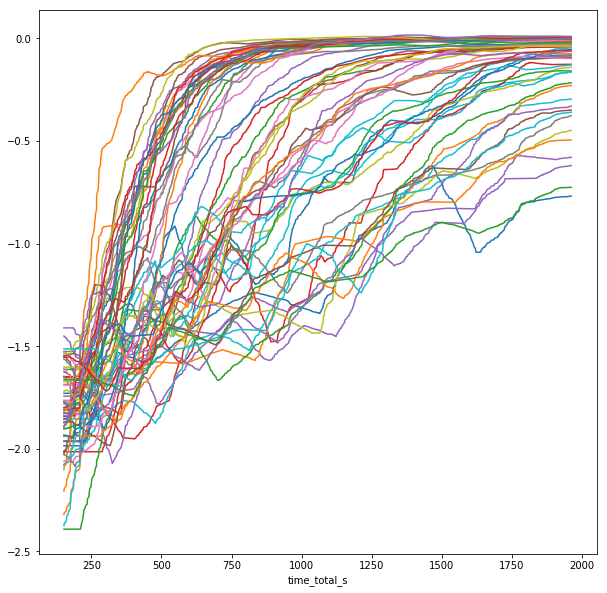

In [2]:
temp = temp.ffill().bfill()
temp.rolling(100).mean().dropna().plot(figsize=(10,10), legend=False); # .legend(bbox_to_anchor=(1.1, 1));

In [3]:
x = temp[250:750].mean()
x.sort_values(ascending=False).head(n=30).to_frame()

0
clip_param entropy_coeff kl_coeff lambda model.fcnet_hiddens num_sgd_iter sgd_batchsize sgd_stepsize timesteps_per_batch          
0.3        0.1           0.4      0.99   [128, 128]          10           10240         0.05         40960               -0.163269
           0.01          0.2      0.99   [64, 64]            4            20480         0.005        40960               -0.218497
                                                                          10240         0.005        40960               -0.235038
                                                             10           20480         0.005        40960               -0.329505
                         0.4      0.99   [64, 64]            10           10240         0.005        40960               -0.365596
                         0.2      0.999  [64, 64]            10           20480         0.005        40960               -0.377750
           0.1           0.2      0.99   [64, 64]            10           10240         0.05         40960               -0.379340
           0.01          0.2      0.999  [64, 64]            10           10240         0.005        40960               -0.390321
                                  0.99   [64, 64]            10           10240         0.005        40960               -0.409802
                                  0.999  [64, 64]            10           10240         0.0005       40960               -0.416929
           0.1           0.4      0.99   [64, 64]            10           10240         0.005        40960               -0.424952
                         0.2      0.99   [64, 64]            10           10240         0.005        40960               -0.427646
           0.01          0.2      0.999  [64, 64]            4            10240         0.005        40960               -0.436961
                                  0.99   [64, 64]            10           10240         0.005        40960               -0.437703
                                  0.999  [64, 64]            4            20480         0.005        40960               -0.458622
           0.1           0.4      0.99   [64, 64]            10           10240         0.05         40960               -0.462784
           0.01          0.2      0.99   [64, 64]            10           20480         0.0005       40960               -0.472527
                         0.4      0.99   [128, 128]          10           10240         0.005        40960               -0.483348
                         0.2      0.99   [64, 64]            10           10240         0.0005       40960               -0.573854
                                         [128, 128]          10           10240         0.005        40960               -0.606858
           0.1           0.2      0.99   [128, 128]          10           10240         0.005        40960               -0.623333
           0.01          0.2      0.999  [64, 64]            10           20480         0.0005       40960               -0.633106
           0.1           0.4      0.99   [128, 128]          10           10240         0.005        40960               -0.664954
           0.01          0.2      0.99   [128, 128]          10           10240         0.05         40960               -0.673955
                                         [64, 64]            10           10240         0.05         40960               -0.797191
                         0.4      0.99   [64, 64]            10           10240         0.05         40960               -0.831153
                         0.2      0.99   [64, 64]            10           20480         0.0005       81920               -0.920172
0.1        0.01          0.2      0.999  [64, 64]            10           10240         0.0005       40960               -1.059799
0.3        0.01          0.2      0.999  [64, 64]            10           20480         0.0005       81920               -1.113928
                                                                    

In [4]:
x.sort_values(ascending=False).tail(n=30).to_frame()

0
clip_param entropy_coeff kl_coeff lambda model.fcnet_hiddens num_sgd_iter sgd_batchsize sgd_stepsize timesteps_per_batch          
0.1        0.01          0.2      0.999  [64, 64]            10           10240         0.005        40960               -1.174313
                                  0.99   [64, 64]            10           20480         0.005        40960               -1.181780
                                  0.999  [64, 64]            10           20480         0.005        40960               -1.195581
                                  0.99   [64, 64]            10           20480         0.0005       40960               -1.195653
                                                             4            20480         0.0005       40960               -1.197478
                                                                                        0.005        40960               -1.199239
0.3        0.01          0.2      0.99   [64, 64]            10           10240         0.0005       81920               -1.228536
0.1        0.01          0.2      0.999  [64, 64]            10           20480         0.0005       40960               -1.238112
0.3        0.01          0.2      0.99   [64, 64]            4            20480         0.0005       40960               -1.243799
0.1        0.01          0.2      0.99   [64, 64]            4            10240         0.0005       40960               -1.252784
                                                                                        0.005        40960               -1.256515
                                  0.999  [64, 64]            4            20480         0.0005       40960               -1.258334
                                  0.99   [64, 64]            10           10240         0.005        40960               -1.275549
                                                                          20480         0.0005       81920               -1.278468
0.3        0.01          0.2      0.999  [64, 64]            4            20480         0.0005       40960               -1.290723
0.1        0.01          0.2      0.999  [64, 64]            4            10240         0.0005       40960               -1.340013
                                                                                                     81920               -1.340767
                                                                          20480         0.005        40960               -1.404858
                                  0.99   [64, 64]            4            10240         0.005        81920               -1.443830
                                                                                        0.0005       81920               -1.463649
                                  0.999  [64, 64]            10           20480         0.0005       81920               -1.492201
                                                                          10240         0.0005       81920               -1.508160
0.3        0.01          0.2      0.99   [64, 64]            4            10240         0.0005       81920               -1.509431
0.1        0.01          0.2      0.99   [64, 64]            10           10240         0.0005       81920               -1.509706
                                                             4            20480         0.0005       81920               -1.528908
                                  0.999  [64, 64]            4            20480         0.0005       81920               -1.535992
0.3        0.01          0.2      0.99   [64, 64]            4            20480         0.0005       81920               -1.550619
           0.1           0.2      0.99   [128, 128]          10           10240         0.05         40960               -1.557167
           0.01          0.2      0.999  [64, 64]            4            20480         0.0005       81920               -1.618556
                                                                    

In [5]:
x = x.rename({'[64, 64]': '64', '[128, 128]': '128'}, level='model.fcnet_hiddens')

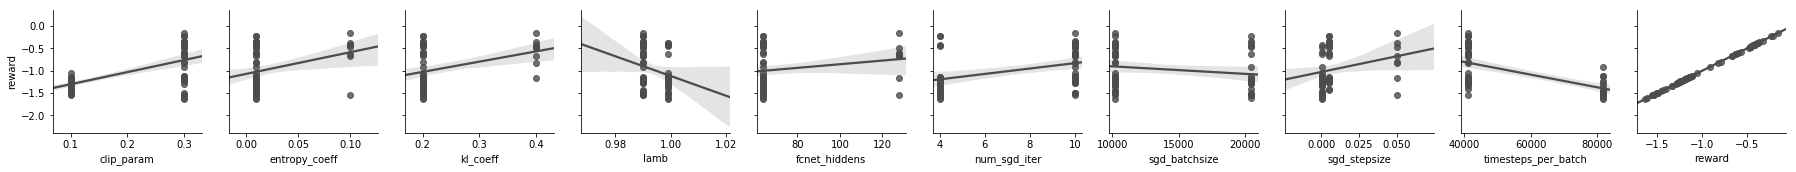

In [6]:
data = x.to_frame(name='reward').reset_index().astype(float)
data = data.rename(columns={'lambda':'lamb', 'model.fcnet_hiddens': 'fcnet_hiddens'})
cols = [str(c) for c in data.columns]

g = sns.PairGrid(data, x_vars=cols, y_vars='reward')
g.map(sns.regplot, color=".3");

In [7]:
' + '.join(cols)

'clip_param + entropy_coeff + kl_coeff + lamb + fcnet_hiddens + num_sgd_iter + sgd_batchsize + sgd_stepsize + timesteps_per_batch + reward'

In [8]:
data_mean = data.subtract(data.mean()) / data.std()
model = ols(formula='reward ~ ' + '  + '.join(cols),
             data=data_mean).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 reward   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.033e+30
Date:                Fri, 24 Aug 2018   Prob (F-statistic):               0.00
Time:                        12:00:55   Log-Likelihood:                 2134.5
No. Observations:                  65   AIC:                            -4247.
Df Residuals:                      54   BIC:                            -4223.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            5.551e-17    1.8e-16      0.308      0.759   -3.06e-16    4.17e-16
clip_param           2.082e-16   2.51e-16      0.831      0.410   -2.94e-16     7.1e-16
entropy_coeff        2.706e-16   2.24e-16      1.209      0.232   -1.78e-16    7.19e-16
kl_coeff             5.135e-16   2.25e-16      2.284      0.026    6.28e-17    9.64e-16
lamb                -1.457e-16   1.98e-16     -0.735      0.465   -5.43e-16    2.52e-16
fcnet_hiddens        4.163e-17   2.28e-16      0.182      0.856   -4.16e-16    4.99e-16
num_sgd_iter         3.157e-16   2.12e-16      1.491      0.142   -1.09e-16     7.4e-16
sgd_batchsize       -4.718e-16   1.97e-16     -2.390      0.020   -8.68e-16   -7.61e-17
sgd_stepsize        -1.527e-16   2.35e-16     -0.649      0.519   -6.24e-16    3.19e-16
timesteps_per_batch  -1.11e-16   2.44e-16     -0.455      0.651      -6e-16    3.78e-16
reward                  1.0000   3.15e-16   3.18e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                        3.678   Durbin-Watson:                   2.256
Prob(Omnibus):                  0.159   Jarque-Bera (JB):                2.858
Skew:                           0.485   Prob(JB):                        0.240
Kurtosis:                       3.335   Cond. No.                         4.42
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

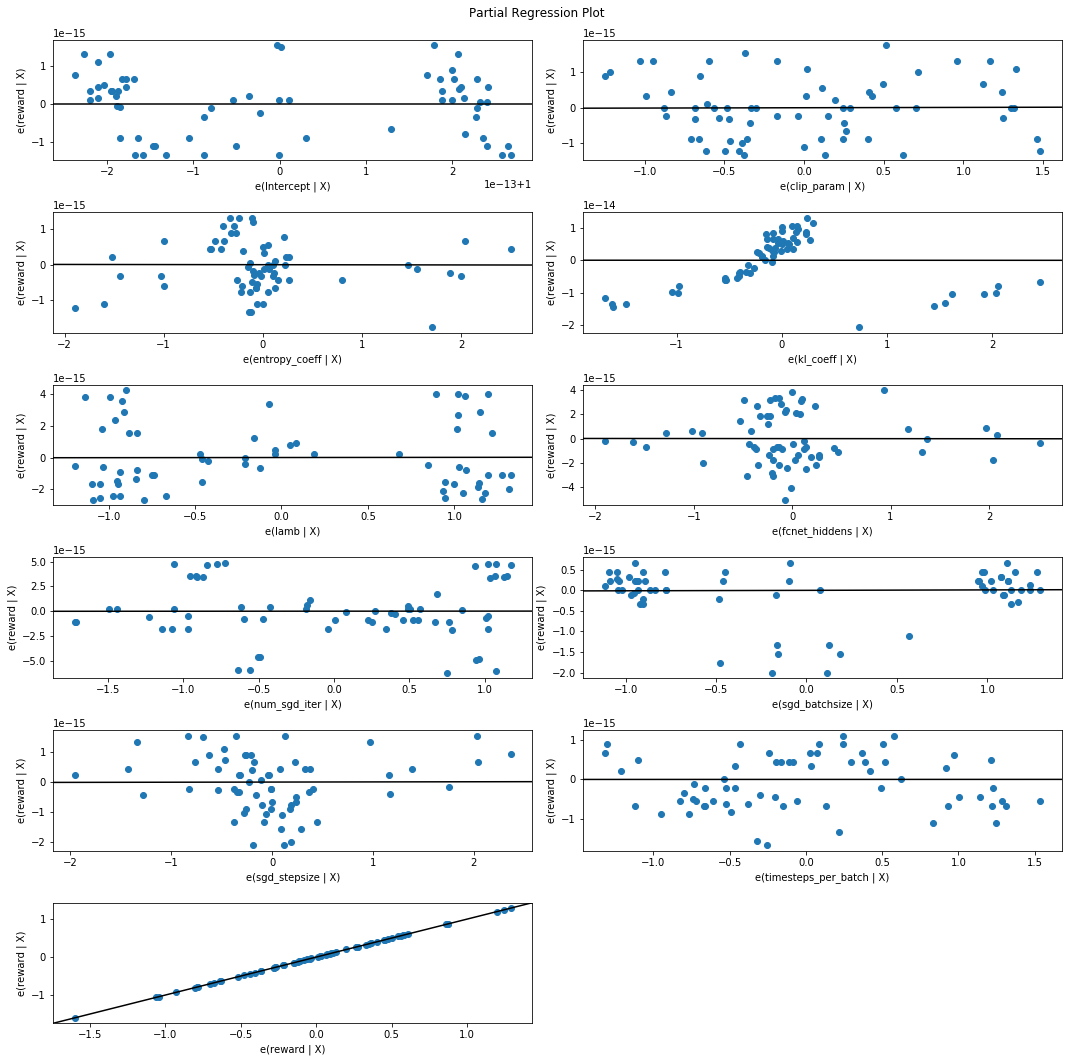

In [9]:
fig = plt.figure(figsize=(15,15))
sm.graphics.plot_partregress_grid(model, fig=fig);

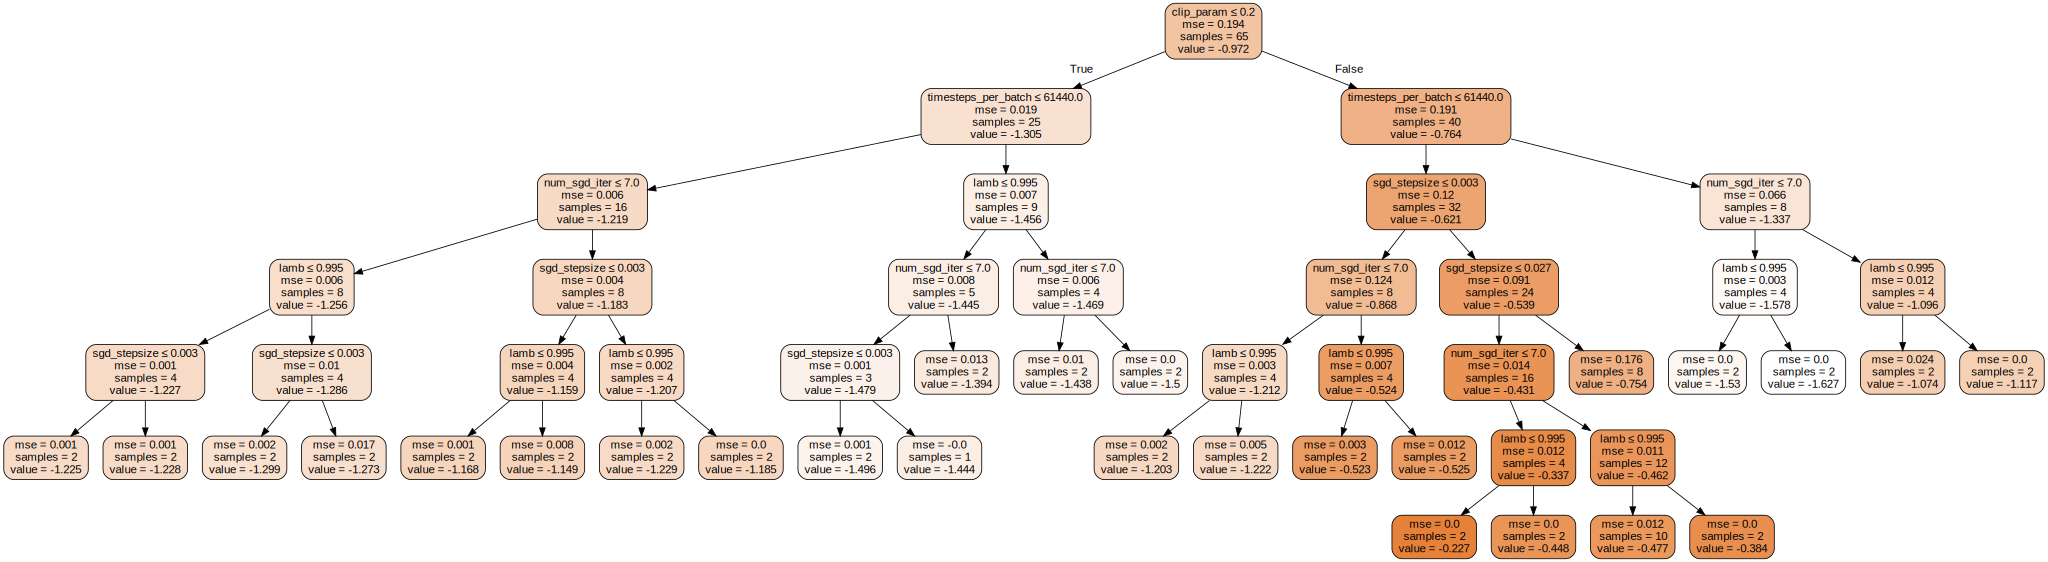

In [10]:
cols = ['clip_param', 'lamb', 'num_sgd_iter', 'sgd_stepsize', 'timesteps_per_batch']
reg = tree.DecisionTreeRegressor().fit(data[cols], data['reward'])
dot_data = tree.export_graphviz(reg, out_file=None,
                         feature_names=cols,   
                         filled=True, rounded=True,  
                         special_characters=True)  
graphviz.Source(dot_data)  